In [1]:
import matplotlib
import matplotlib.pyplot as plt
import operator
import pickle
import snap
%matplotlib inline

In [2]:
def get_comm_info(comm_file):
    '''
    get community information, two maps
    map1: key: user id, value: community id array
    map2: key: community id, value: user id array
    '''
    comm_map_usr = {}
    comm_map_comm = {}
    comm_id = 0
    with open(comm_file, 'r') as cf:
        for line in cf:
            node_list = line.split('\t')
            node_list = [int(id) for id in node_list]
            for id in node_list:
                if id in comm_map_usr:
                    comm_map_usr[id].append(comm_id)
                else:
                    comm_map_usr[id] = [comm_id]
            comm_map_comm[comm_id] = node_list[:]
            comm_id += 1
    return comm_map_usr, comm_map_comm

In [3]:
gf_file = "data/com-lj.ungraph.txt"
gf = snap.LoadEdgeList(snap.PUNGraph, gf_file, 0, 1)

In [4]:
print "Load graph! With nodes ", gf.GetNodes(), " and edges ", gf.GetEdges()

Load graph! With nodes  3997962  and edges  34681189


In [5]:
comm_file = 'data/com-lj.all.cmty.txt'

comm_map_usr, comm_map_comm = get_comm_info(comm_file)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [5]:
##--Get page rank centrality (may need to calibrate the parameter)
pgrk_H = snap.TIntFltH()

snap.GetPageRank(gf, pgrk_H)

In [8]:
##--convert hash to map and dump to pkl file
pgrk_map = {}
for key in pgrk_H:
    pgrk_map[key] = pgrk_H[key]

pgrk_file = "pgrk.pkl"

with  open(pgrk_file, "wb") as fl:
    pickle.dump(pgrk_map, fl)

In [9]:
##--reload pagerank data from pkl file
pgrk_map = {}

pgrk_file = "pgrk.pkl"

with  open(pgrk_file, "r") as fl:
    pgrk_map = pickle.load(fl)

In [15]:
##--page rank value
pgrk_ary = []

for key in pgrk_map:
    pgrk_ary.append(pgrk_map[key])
    
pgrk_ary = sorted(pgrk_ary, reverse=True)

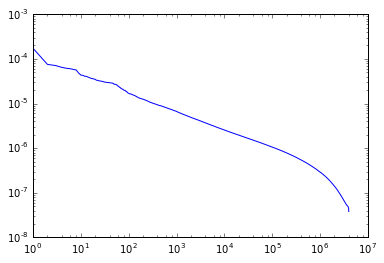

In [17]:
plt.loglog(range(len(pgrk_ary)), pgrk_ary)
plt.show()

In [24]:
##--sorted pagerank
sorted_pgrk = sorted(pgrk_map.items(), key = operator.itemgetter(1), reverse=True)

sorted_id = [ item[0] for item in sorted_pgrk ]

In [26]:
in_comm = []
for id in sorted_id:
    if id in comm_map_usr:
        in_comm.append(1)
    else:
        in_comm.append(0)

In [29]:
print sorted_id[:100]
print in_comm[:100]

[9766, 9765, 447075, 4435, 2806, 54974, 11509, 13664, 23205, 7832, 10428, 5442, 50516, 57045, 1124620, 187509, 1335232, 864248, 1987803, 3389, 2791103, 9783, 170786, 9261, 7486, 78458, 13294, 6395, 817235, 865515, 2181652, 63840, 208336, 9772, 53198, 9779, 4492, 4128, 2883, 1656406, 146797, 1071911, 2890632, 1754869, 52171, 77918, 42463, 56256, 58926, 382932, 1554534, 155706, 52022, 18154, 470862, 1489387, 3900700, 77451, 9787, 38254, 55514, 53252, 258378, 75598, 53947, 6728, 107523, 52977, 48478, 6691, 6693, 107548, 9777, 1338374, 3302657, 53767, 1127525, 33625, 177607, 52984, 3165024, 9851, 4129, 170465, 17790, 23132, 9818, 15510, 52669, 52062, 53777, 16408, 10646, 77454, 1320096, 3966992, 11708, 17603, 6698, 293397]
[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 

In [6]:
##--get community size
comm_size = {}

for id in comm_map_comm:
    comm_size[id] = len(comm_map_comm[id])
    
##--sorted community by its size
sorted_comm_size = sorted(comm_size.items(), key = operator.itemgetter(1), reverse=True)

sorted_id_comm_size = [ item[0] for item in sorted_comm_size ]

In [31]:
print sorted_id_comm_size[:100]

[664006, 663287, 662541, 661354, 661646, 659019, 660448, 659444, 658401, 658204, 656578, 656690, 656062, 655618, 656293, 657769, 653762, 655297, 652794, 655187, 652773, 654692, 656993, 655724, 650822, 653769, 650830, 649876, 651333, 650282, 655378, 654480, 648906, 649277, 653852, 652810, 654792, 647361, 649472, 646601, 650692, 646614, 651867, 654102, 646467, 646457, 647536, 650839, 649199, 646443, 651075, 650517, 645207, 646633, 644803, 648913, 643217, 650292, 645070, 647231, 646669, 649549, 645193, 644280, 646805, 644289, 646919, 647921, 643516, 646745, 651391, 649020, 648031, 645395, 646141, 647076, 641906, 644238, 649321, 649884, 647371, 641437, 641679, 640634, 638559, 645436, 643522, 638781, 644419, 636069, 646476, 636074, 641446, 642258, 637719, 645993, 638888, 642763, 636050, 641642]


In [7]:
##--we see a single community as a graph
def get_single_comm(gf, comm_map_comm, c_id):
    '''
    return a graph from a community in a graph
    '''
    node_id_list = comm_map_comm[c_id]
    gf_comm = snap.TUNGraph.New()
    for id in node_id_list:
        gf_comm.AddNode(id)
    for id in node_id_list:
        ni = gf.GetNI(id)
        deg = ni.GetDeg()
        for nbr_i in xrange(deg):
            nbr_id = ni.GetNbrNId(nbr_i)
            if nbr_id in node_id_list:
                gf_comm.AddEdge(id, nbr_id)
    return gf_comm

In [8]:
##--rank nodes with ordered pagerank in each community, if we see each single community as a graph
comm_high_pgrk_cnt = {}
for i in xrange(len(sorted_id_comm_size)):
    comm_gf = get_single_comm(gf, comm_map_comm, sorted_id_comm_size[i])
    tmp_pgrk_H = snap.TIntFltH()
    snap.GetPageRank(comm_gf, tmp_pgrk_H)
    tmp_pgrk_map = {}
    for key in tmp_pgrk_H:
        tmp_pgrk_map[key] = tmp_pgrk_H[key]
    tmp_sorted_pgrk = sorted(tmp_pgrk_map.items(), key = operator.itemgetter(1), reverse=True)
    tmp_sorted_id_pgrk = [ item[0] for item in tmp_sorted_pgrk ]
    comm_high_pgrk_cnt[sorted_id_comm_size[i]] = tmp_sorted_id_pgrk

In [9]:
pgrk_file = "pgrk_commonly.pkl"

with  open(pgrk_file, "wb") as fl:
    pickle.dump(comm_high_pgrk_cnt, fl)

In [10]:
##--we see a single community and its immediate friend as a graph
def get_single_comm1st(gf, comm_map_comm, c_id):
    '''
    return a graph from a community in a graph
    '''
    node_id_list = comm_map_comm[c_id]
    gf_comm = snap.TUNGraph.New()
    for id in node_id_list:
        gf_comm.AddNode(id)
    for id in node_id_list:
        ni = gf.GetNI(id)
        deg = ni.GetDeg()
        for nbr_i in xrange(deg):
            nbr_id = ni.GetNbrNId(nbr_i)
            if not gf_comm.IsNode(nbr_id):
                gf_comm.AddNode(nbr_id)
            gf_comm.AddEdge(id, nbr_id)
    return gf_comm

In [12]:
##--rank nodes with ordered pagerank in each community, if we see each single community as a graph
comm_high_pgrk_cnt_1st = {}
for i in xrange(len(sorted_id_comm_size)):
    comm_gf = get_single_comm1st(gf, comm_map_comm, sorted_id_comm_size[i])
    tmp_pgrk_H = snap.TIntFltH()
    snap.GetPageRank(comm_gf, tmp_pgrk_H)
    tmp_pgrk_map = {}
    for key in tmp_pgrk_H:
        tmp_pgrk_map[key] = tmp_pgrk_H[key]
    tmp_sorted_pgrk = sorted(tmp_pgrk_map.items(), key = operator.itemgetter(1), reverse=True)
    tmp_sorted_id_pgrk = [ item[0] for item in tmp_sorted_pgrk ]
    comm_high_pgrk_cnt_1st[sorted_id_comm_size[i]] = tmp_sorted_id_pgrk

In [13]:
pgrk_file = "pgrk_comm1st.pkl"

with  open(pgrk_file, "wb") as fl:
    pickle.dump(comm_high_pgrk_cnt_1st, fl)